In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [3]:
from manofunkcijos import *

In [4]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()

In [24]:
# https://sqlitebrowser.org/
# prisijungimas prie sqlite
SDB = sqlite3.connect('Testas.db') # jei neegzistuoja, bus sukurta nauja sqlite DB
Cs = SDB.cursor()

In [11]:
# lentelės sukūrimas sql duomenų bazėje
sql = '''create table pop_auto
(
    Gamintojas text not null,
    Vid_kaina real not null,
    Vid_rida real not null,
    Vid_amzius real not null,    
    Kiekis integer not null
)'''

Cs.execute(sql)

In [80]:
# duomenų įrašymas į sql
SDB.commit()

In [21]:
# atrinkti 10 populiariausių gamintojų iš autopliuslt, pateikti tokius stulpelius -
# gamintojas, vidutinė kaina, vidutinė rida, vidutinis amžius, modelių kiekis. 
# Gautus rezultatus surašyti į SQLite duomebazę, pavadinimu "Testas.db", lentelės pavadinimas kokį sugalvosite. 
# Viską turi atlikti python kodas. PANDAS NEGALIMA NAUDOTI, viską atlikite per cursor() objektus.

sql="""select  Gamintojas, round(avg(2024-substring(pagaminimo_data,1,4)),0) as amzius, round(avg(cast(replace(price,' ','') as float)),0) as Kaina, round(avg(cast(replace(replace(rida,' ',''),'km','')as float)),0) as Rida, count(*) as Kiekis  from autopliuslt
where Rida <> 'Nenurodyta'
group by Gamintojas
order by Kiekis desc
limit 10;"""

#sql užklausos vykdymas per mysql/mariadb kursorių

C.execute(sql)
ans = C.fetchall()
gamintojas, amzius, kaina, rida, kiekis = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [27]:
print(ans)

[('BMW', 15.0, 10721.0, 263543.0, 361), ('Volkswagen', 16.0, 6358.0, 246394.0, 299), ('Audi', 16.0, 8787.0, 252499.0, 217), ('Mercedes-Benz', 15.0, 15295.0, 265764.0, 174), ('Toyota', 15.0, 8582.0, 211363.0, 147), ('Volvo', 15.0, 7893.0, 280066.0, 137), ('Opel', 16.0, 4113.0, 241187.0, 126), ('Ford', 15.0, 5708.0, 232013.0, 107), ('Peugeot', 14.0, 6011.0, 217010.0, 74), ('Skoda', 11.0, 10911.0, 186229.0, 72)]


In [26]:
SDB = sqlite3.connect('Testas.db') # jei neegzistuoja, bus sukurta nauja sqlite DB
Cs = SDB.cursor()
# if not exsists ignoruoja lenteles kurima jai tokia yra
sql = '''create table if not exists pop_auto
(
    Gamintojas text not null,
    Vid_kaina real not null,
    Vid_rida real not null,
    Vid_amzius real not null,    
    Kiekis integer not null
)'''

Cs.execute(sql)

sql_template = '''insert into pop_auto values (?,?,?,?,?)'''
# data = [(gamintojas, kaina, rida, amzius,kiekis)]
# Cs.executemany(sql_template, data)
for g, k, r, a, kie in zip(gamintojas,kaina,rida,amzius,kiekis):
    sql_template = '''insert into pop_auto values (?,?,?,?,?)'''
    Cs.execute(sql_template, (g, k, r, a, kie))

SDB.commit()

SDB.close()

In [5]:
# pandas ir JSON:

#  https://data.gov.lt/datasets/509/

# nuskaitykite JSON failą -  2023 metus

# konvertuokite dataLaikas stulpelį į datetime
#  pd.to_datetime(df[stulpelis])

# pridėkite naują stulpelį su paros laikais (rytas, vakaras ...)
# pridėkite naują stulplelį, kur būtų tik įvykio valanda
# Vizualizuokite, kuriuo paros laiku, kurią valandą įvyksta daugiausiai eismo įvykių

# sekantiems klausimams patys sugalvojate tinkamiausias vizualizacijas
# Vyrų ar moterų buvo daugiau, sukėlusių eismo įvykį? (stuleplis esimosDalyviai)
#  koks vidutinis kaltininkų amžius?
# Kokiomis baudų rūšimis buvo nubausti vyrai/moterys (administracinė, baudžiamoji) (teisenosStadijaBusena)
df = pd.read_json('DATA/ei_2023_12_31.json')
df.head()

,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,kelioElementas2,privalomasLeistinasGreitis,leistinasGreitis,neblaivusKaltininkai,apsvaigeKaltininkai,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone
0,07-23-9588945,2023-01-01 00:27,2023-01-01 01:04,2023-03-31 12:14,0,Kiti eismo įvykiai,Kiti eismo įvykiai,Kiti eismo įvykiai,2,0,...,None,1,40.0,Ne,Ne,Ne,6063990.0,579292.0,"[{'dalyvisId': 48690423, 'kategorija': 'Kiti',...","[{'tpId': 33646065, 'regValstybe': 'Lietuva', ..."
1,07-23-9588946,2023-01-01 00:10,2023-01-01 01:04,2023-01-01 02:50,0,Susidūrimas,Susidūrimai judant ta pačia kryptimi,Atsitrenkimas į galą,2,0,...,None,1,50.0,Taip,Ne,Ne,6178087.0,336529.0,"[{'dalyvisId': 48474937, 'kategorija': 'Automo...","[{'tpId': 33416867, 'regValstybe': 'Lietuva', ..."
2,07-23-9588947,2023-01-01 00:38,2023-01-01 01:39,2023-01-02 14:44,0,Susidūrimas su stovinčia transporto priemone,Kiti susidūrimai,Kiti susidūrimai,2,0,...,None,1,20.0,Ne,Ne,Ne,6061672.0,582508.0,"[{'dalyvisId': 48480520, 'kategorija': 'Automo...","[{'tpId': 33421658, 'regValstybe': 'Lietuva', ..."
3,07-23-9588948,2023-01-01 00:35,2023-01-01 01:58,2023-01-01 02:17,0,Kiti eismo įvykiai,Nuvažiavimai nuo kelio,Nuvažiavimai nuo kelio į dešinę tiesiame ruože,1,0,...,None,1,110.0,Ne,Ne,Ne,6149775.0,540444.0,"[{'dalyvisId': 48474443, 'kategorija': 'Automo...","[{'tpId': 33416857, 'regValstybe': 'Lietuva', ..."
4,07-23-9588949,2022-12-31 23:53,2023-01-01 02:05,2023-02-13 10:50,0,Susidūrimas su stovinčia transporto priemone,Kiti eismo įvykiai,Susidūrimas su stovinčia TP,2,0,...,None,1,20.0,Ne,Ne,Ne,6069699.0,581077.0,"[{'dalyvisId': 48579303, 'kategorija': 'Automo...","[{'tpId': 33533521, 'regValstybe': 'Lietuva', ..."


In [6]:
df['dataLaikas'] = pd.to_datetime(df['dataLaikas'])


In [7]:
def dien_metas(i):
    if i >= 0 and i<=6:
        return 'Naktis'
    elif i >= 7 and i<=10:
        return 'Rytas'
    elif i >= 11 and i<=12:
        return 'Priešpietė'
    elif i >= 13 and i<=14:
        return 'Pietūs'
    elif i >= 15 and i<=16:
        return 'Pavakarė'
    elif i >= 19 and i<=22:
        return 'Vakaras'
    elif i == 23:
        return 'Naktis'

In [8]:
df['V'] = df['dataLaikas'].dt.hour
df.head(5)

,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,privalomasLeistinasGreitis,leistinasGreitis,neblaivusKaltininkai,apsvaigeKaltininkai,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone,V
0,07-23-9588945,2023-01-01 00:27:00,2023-01-01 01:04,2023-03-31 12:14,0,Kiti eismo įvykiai,Kiti eismo įvykiai,Kiti eismo įvykiai,2,0,...,1,40.0,Ne,Ne,Ne,6063990.0,579292.0,"[{'dalyvisId': 48690423, 'kategorija': 'Kiti',...","[{'tpId': 33646065, 'regValstybe': 'Lietuva', ...",0
1,07-23-9588946,2023-01-01 00:10:00,2023-01-01 01:04,2023-01-01 02:50,0,Susidūrimas,Susidūrimai judant ta pačia kryptimi,Atsitrenkimas į galą,2,0,...,1,50.0,Taip,Ne,Ne,6178087.0,336529.0,"[{'dalyvisId': 48474937, 'kategorija': 'Automo...","[{'tpId': 33416867, 'regValstybe': 'Lietuva', ...",0
2,07-23-9588947,2023-01-01 00:38:00,2023-01-01 01:39,2023-01-02 14:44,0,Susidūrimas su stovinčia transporto priemone,Kiti susidūrimai,Kiti susidūrimai,2,0,...,1,20.0,Ne,Ne,Ne,6061672.0,582508.0,"[{'dalyvisId': 48480520, 'kategorija': 'Automo...","[{'tpId': 33421658, 'regValstybe': 'Lietuva', ...",0
3,07-23-9588948,2023-01-01 00:35:00,2023-01-01 01:58,2023-01-01 02:17,0,Kiti eismo įvykiai,Nuvažiavimai nuo kelio,Nuvažiavimai nuo kelio į dešinę tiesiame ruože,1,0,...,1,110.0,Ne,Ne,Ne,6149775.0,540444.0,"[{'dalyvisId': 48474443, 'kategorija': 'Automo...","[{'tpId': 33416857, 'regValstybe': 'Lietuva', ...",0
4,07-23-9588949,2022-12-31 23:53:00,2023-01-01 02:05,2023-02-13 10:50,0,Susidūrimas su stovinčia transporto priemone,Kiti eismo įvykiai,Susidūrimas su stovinčia TP,2,0,...,1,20.0,Ne,Ne,Ne,6069699.0,581077.0,"[{'dalyvisId': 48579303, 'kategorija': 'Automo...","[{'tpId': 33533521, 'regValstybe': 'Lietuva', ...",23


In [9]:

df['Dienos_metas'] = df['V'].apply(dien_metas)


In [10]:
def teis_stad(x):
    for i in x:
        if i['kaltininkas'] == 'Taip':
            return i['lytis']

In [11]:
def amzius(x):
    for i in x:
        if i['kaltininkas'] == 'Taip':
            return i['amzius']

In [12]:
def teis(x):
    for i in x:
        if i['kaltininkas'] == 'Taip':
            return i['teisenosStadijaBusena']


In [13]:
df['lytis'] = df['eismoDalyviai'].apply(teis_stad)
df['teis_stad'] = df['eismoDalyviai'].apply(teis)
df['amzius'] = df['eismoDalyviai'].apply(amzius)

In [14]:
df.head(5)

,registrokodas,dataLaikas,registravimoData,paskutinioRedagavimoLaikas,iskaitinis,rusis,schema1,schema2,dalyviuSkaicius,zuvusiuSkaicius,...,atsisakeTikrintisKaltininkai,ilguma,platuma,eismoDalyviai,eismoTranspPreimone,V,Dienos_metas,lytis,teis_stad,amzius
0,07-23-9588945,2023-01-01 00:27:00,2023-01-01 01:04,2023-03-31 12:14,0,Kiti eismo įvykiai,Kiti eismo įvykiai,Kiti eismo įvykiai,2,0,...,Ne,6063990.0,579292.0,"[{'dalyvisId': 48690423, 'kategorija': 'Kiti',...","[{'tpId': 33646065, 'regValstybe': 'Lietuva', ...",0,Naktis,Vyras,ADMINISTRACINIS,50.0
1,07-23-9588946,2023-01-01 00:10:00,2023-01-01 01:04,2023-01-01 02:50,0,Susidūrimas,Susidūrimai judant ta pačia kryptimi,Atsitrenkimas į galą,2,0,...,Ne,6178087.0,336529.0,"[{'dalyvisId': 48474937, 'kategorija': 'Automo...","[{'tpId': 33416867, 'regValstybe': 'Lietuva', ...",0,Naktis,Vyras,ADMINISTRACINIS,27.0
2,07-23-9588947,2023-01-01 00:38:00,2023-01-01 01:39,2023-01-02 14:44,0,Susidūrimas su stovinčia transporto priemone,Kiti susidūrimai,Kiti susidūrimai,2,0,...,Ne,6061672.0,582508.0,"[{'dalyvisId': 48480520, 'kategorija': 'Automo...","[{'tpId': 33421658, 'regValstybe': 'Lietuva', ...",0,Naktis,Vyras,ADMINISTRACINIS,45.0
3,07-23-9588948,2023-01-01 00:35:00,2023-01-01 01:58,2023-01-01 02:17,0,Kiti eismo įvykiai,Nuvažiavimai nuo kelio,Nuvažiavimai nuo kelio į dešinę tiesiame ruože,1,0,...,Ne,6149775.0,540444.0,"[{'dalyvisId': 48474443, 'kategorija': 'Automo...","[{'tpId': 33416857, 'regValstybe': 'Lietuva', ...",0,Naktis,None,ADMINISTRACINIS,NaN
4,07-23-9588949,2022-12-31 23:53:00,2023-01-01 02:05,2023-02-13 10:50,0,Susidūrimas su stovinčia transporto priemone,Kiti eismo įvykiai,Susidūrimas su stovinčia TP,2,0,...,Ne,6069699.0,581077.0,"[{'dalyvisId': 48579303, 'kategorija': 'Automo...","[{'tpId': 33533521, 'regValstybe': 'Lietuva', ...",23,Naktis,None,ADMINISTRACINIS,NaN


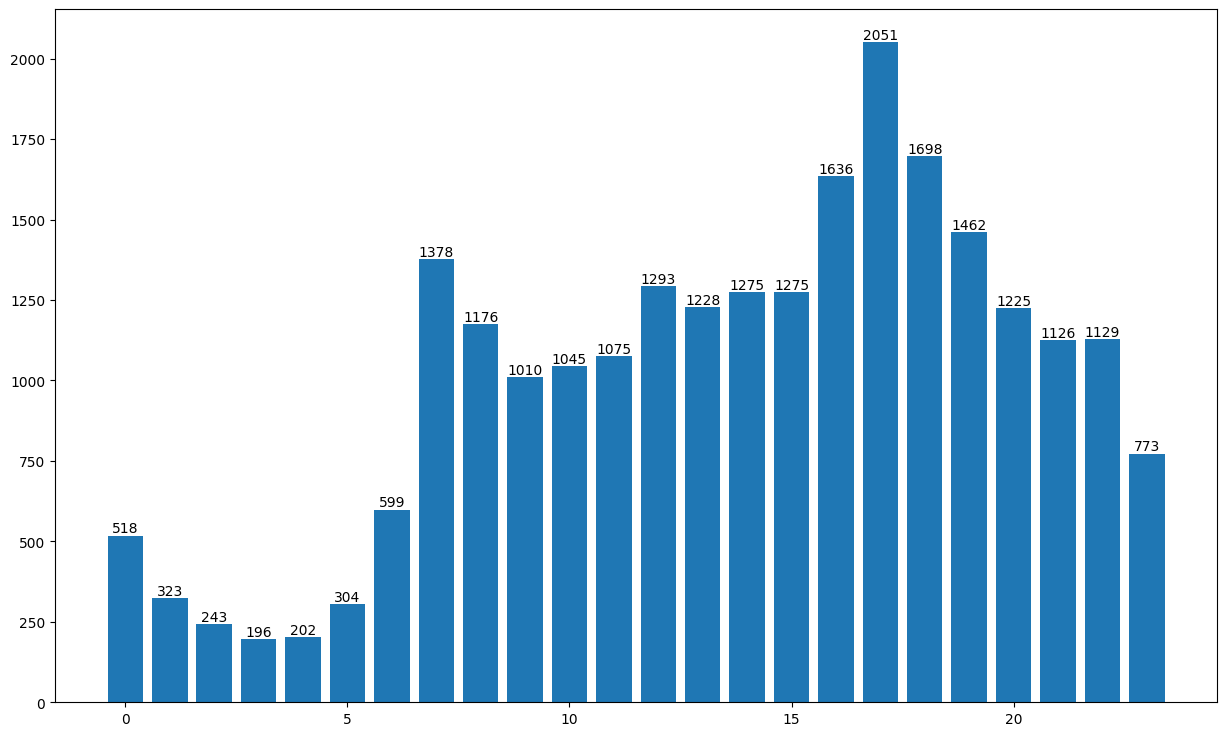

In [15]:
l = df[df['lytis'] != None]
dfg = df[['V', 'registrokodas']].groupby('V').count().reset_index()
# df.groupby(['V'])['lytis'].count().unstack().plot(kind='pie')
fig, axes = plt.subplots(figsize=(15,9))
a = axes.bar(dfg['V'], dfg['registrokodas'])
axes.bar_label(a)
plt.show()

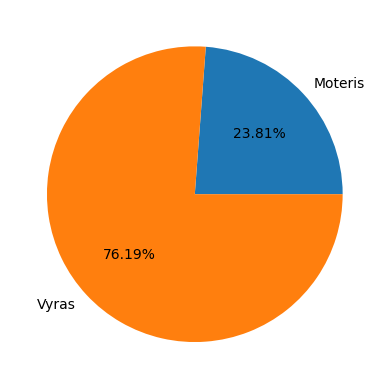

In [16]:
df_lytis = df[['V', 'lytis']].groupby('lytis').count().reset_index()
plt.pie(x=df_lytis['V'], labels=df_lytis['lytis'], autopct='%.2f%%')
plt.show()


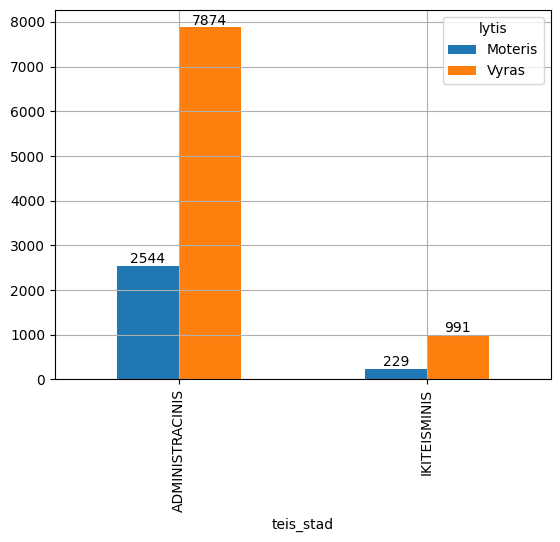

In [17]:
ax = df.groupby(['teis_stad','lytis'])['amzius'].count().unstack().plot(kind='bar', subplots=False, grid=True)

for container in ax.containers:
    ax.bar_label(container)

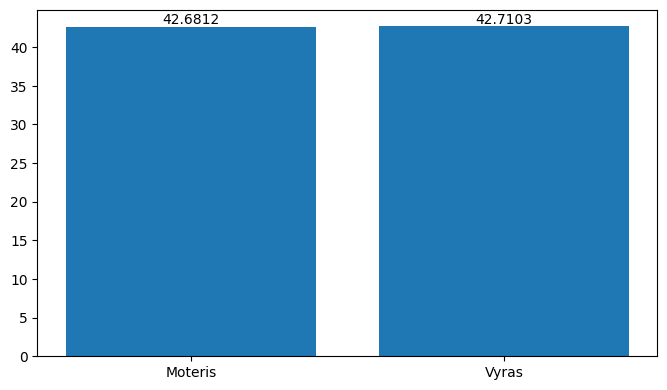

In [18]:
df_amzius = df[['amzius', 'lytis']].groupby('lytis').mean().reset_index()
fig, axes = plt.subplots(figsize=(8,4.5))
a = axes.bar(df_amzius['lytis'], df_amzius['amzius'])
axes.bar_label(a)
plt.show()

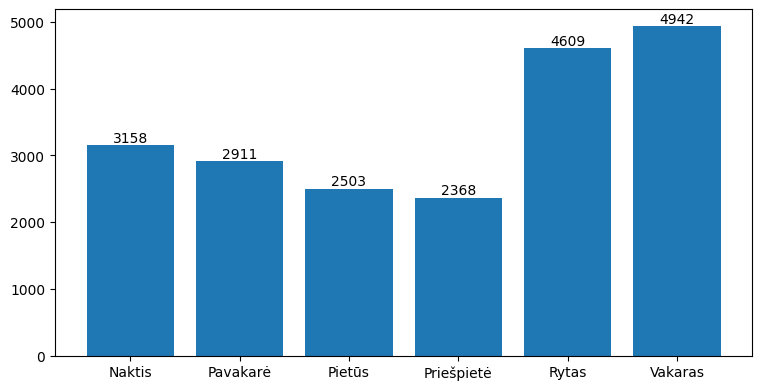

In [19]:
df_dien = df[['Dienos_metas', 'registrokodas']].groupby('Dienos_metas').count().reset_index()
# df.groupby(['V'])['lytis'].count().unstack().plot(kind='pie')
fig, axes = plt.subplots(figsize=(9,4.5))
a = axes.bar(df_dien['Dienos_metas'], df_dien['registrokodas'])
axes.bar_label(a)
plt.show()

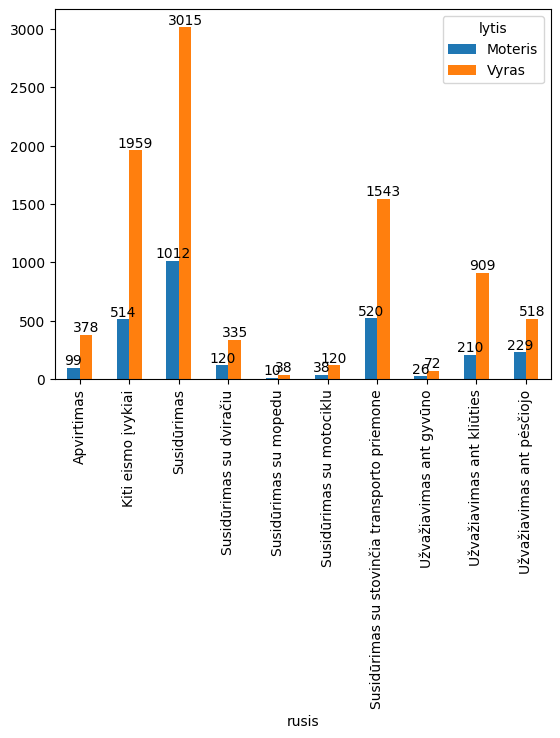

In [22]:
ax = df.groupby(['rusis','lytis'])['rusis'].count().unstack().plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container)